## Importing of Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2
import imghdr

data_dir = '/content/drive/MyDrive/Data'

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

PNEUMONIA
NORMAL


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data',
                                                   image_size = (220, 220))

Found 3760 files belonging to 2 classes.


In [ ]:
# Allows us to access the data and loop through it
data_iterator = data.as_numpy_iterator()

In [ ]:
# Get another batch from iterator
batch = data_iterator.next()

In [ ]:
# Image represented as Numpy arrays
batch[0].shape

(32, 220, 220, 3)

In [ ]:
# 1 = Pneumonia
# 0 = Normal

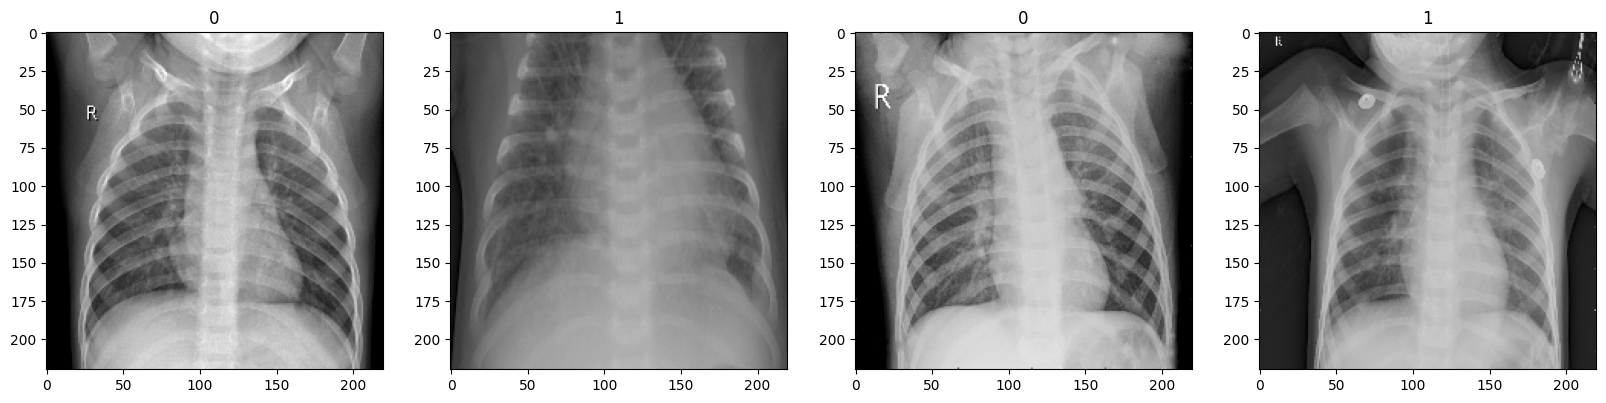

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

In [ ]:
len(data)

118

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Creating the Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 220, 220, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(220,220,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 109, 109, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 51, 51, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 25, 25, 16)       

In [ ]:
##tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train,
                 epochs=10,
                 validation_data=val)

Epoch 1/10
82/82 [==============================] - 71s 816ms/step - loss: 0.4420 - accuracy: 0.7881 - val_loss: 0.2466 - val_accuracy: 0.9062
Epoch 2/10
82/82 [==============================] - 69s 818ms/step - loss: 0.2158 - accuracy: 0.9116 - val_loss: 0.1439 - val_accuracy: 0.9518
Epoch 3/10
82/82 [==============================] - 68s 815ms/step - loss: 0.1580 - accuracy: 0.9390 - val_loss: 0.1424 - val_accuracy: 0.9479
Epoch 4/10
82/82 [==============================] - 69s 817ms/step - loss: 0.1514 - accuracy: 0.9428 - val_loss: 0.1773 - val_accuracy: 0.9310
Epoch 5/10
82/82 [==============================] - 68s 800ms/step - loss: 0.1520 - accuracy: 0.9436 - val_loss: 0.2007 - val_accuracy: 0.9219
Epoch 6/10
82/82 [==============================] - 68s 814ms/step - loss: 0.1377 - accuracy: 0.9474 - val_loss: 0.1321 - val_accuracy: 0.9531
Epoch 7/10
82/82 [==============================] - 68s 811ms/step - loss: 0.1225 - accuracy: 0.9505 - val_loss: 0.1509 - val_accuracy: 0.9466

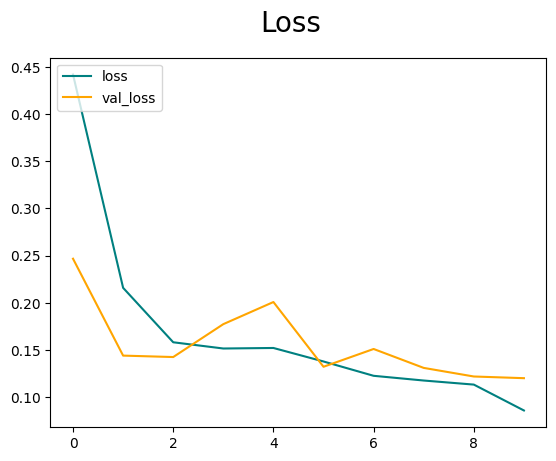

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


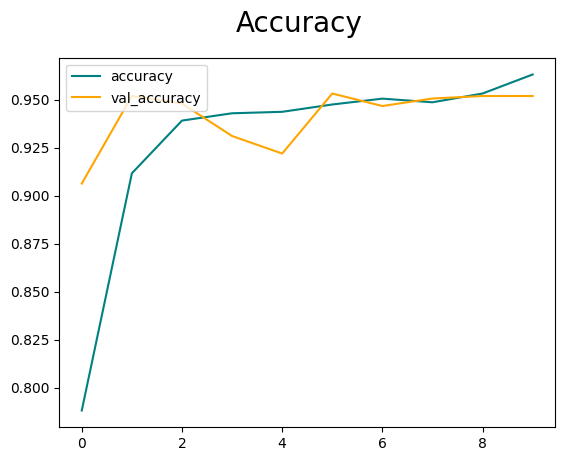

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')


Precision:0.9567307829856873, Recall:0.9431279897689819, Accuracy: 0.9403409361839294
